In [90]:
import requests, json, pandas, datetime, collections
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets.widgets.interaction import show_inline_matplotlib_plots


In [2]:
import requests, json, pandas
import matplotlib.pyplot as plt
body = {"username":"testapi1", "password":"coronavirus19"}

response = requests.post("https://covid19.cloudeya.org/token", data=body)
token = response.json()['Document']

auth = {'Authorization': 'Bearer ' + token}
rawData = requests.get("https://covid19.cloudeya.org/time_series_confirmed_global", headers=auth)
rawDataDeaths = requests.get("https://covid19.cloudeya.org/time_series_deaths_global", headers=auth)

In [3]:
dataDf = pandas.DataFrame(json.loads(rawData.text)['Document']).groupby('country_region').sum().iloc[:, 3:].transpose()
dataDfDeaths = pandas.DataFrame(json.loads(rawDataDeaths.text)['Document']).groupby('country_region').sum().iloc[:, 3:].transpose()

In [4]:
dataDf.head(10)
dataDfDeaths

country_region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
jan222020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jan232020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jan242020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jan252020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
jan262020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dec072020,1900,922,2527,78,354,4,39888,2344,908,3897,...,61531,83,611,0,924,35,848,649,364,294
dec082020,1906,936,2539,78,355,4,40009,2372,908,4002,...,62130,86,611,0,928,35,867,606,364,303
dec092020,1919,951,2554,78,358,4,40222,2393,908,4056,...,62663,87,611,0,933,35,890,606,364,304
dec102020,1935,965,2564,78,362,4,40431,2416,908,4163,...,63179,90,611,0,938,35,910,606,364,305


In [5]:
dateStrings = [ " ".join([x[:3], x[3:5], x[5:]]) for x in dataDf.index.values]
dates = [datetime.datetime.strptime(x,  "%b %d %Y" ) for x in dateStrings] 


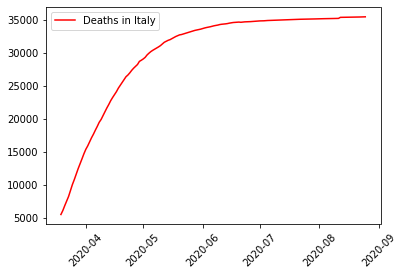

In [165]:
f, ax = plt.subplots()
# ax.plot(dates[57:217],  dataDf.loc[:,'Italy'][60:220].squeeze(), label='Confirmed Cases in Italy', color='blue')
ax.plot(dates[57:217],  dataDfDeaths.loc[:,'Italy'][60:220].squeeze(), label='Deaths in Italy', color='red')
plt.setp(ax.get_xticklabels(), rotation=45)
ax.legend();


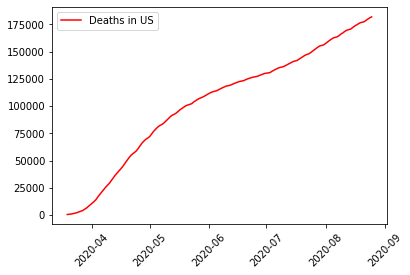

In [164]:
f, ax = plt.subplots()
# ax.plot(dates[57:217],  dataDf.loc[:,'US'][60:220].squeeze(), label='Confirmed Cases in US', color='blue')
ax.plot(dates[57:217],  dataDfDeaths.loc[:,'US'][60:220].squeeze(), label='Deaths in US', color='red')
plt.setp(ax.get_xticklabels(), rotation=45)
ax.legend();


In [152]:
def plotFactory(df, title=""):
    def inner(plotHandle, *countries, **dateWindow):
        dateStrings = [ " ".join([x[:3], x[3:5], x[5:]]) for x in df.index.values]
        dates = [datetime.datetime.strptime(x,  "%b %d %Y" ) for x in dateStrings] 
        colors = ['b', 'r', 'c', 'y', 'k', 'm', 'g']
        lastDate = dates[-1]
        months = {month: idx+1 for idx, month in enumerate(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec'])}
        startMonth = 1 if 'beginningMonth' not in dateWindow else months[dateWindow['beginningMonth'].lower()]
        endMonth = int(lastDate.strftime("%m")) if 'endingMonth' not in dateWindow else months[dateWindow['endingMonth'].lower()] 
        startYear, endYear = [2020 if time not in dateWindow else dateWindow[time] for time in ['beginningYear', 'endingYear']]
        dateMask = [date> datetime.datetime(startYear,startMonth, 1) and date < datetime.datetime(endYear, endMonth, 28) for date in dates]
        ax = plotHandle
        for (country,color) in zip(countries, colors):
            ax.plot(maskList(dates, dateMask),  df.loc[dateMask,country].squeeze(), label=country, color=color)

        ax.legend()
        plt.setp(ax.get_xticklabels(), rotation=45)
        plt.title(label=title)
    return inner
    
def maskList(l, mask):
    return [litem for m, litem in zip(mask, l) if m]

def justData(df, *countries, **dateWindow):
        dateStrings = [ " ".join([x[:3], x[3:5], x[5:]]) for x in df.index.values]
        dates = [datetime.datetime.strptime(x,  "%b %d %Y" ) for x in dateStrings] 
        colors = ['b', 'r', 'c', 'y', 'k', 'm', 'g']
        lastDate = dates[-1]
        months = {month: idx+1 for idx, month in enumerate(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec'])}
        startMonth = 1 if 'beginningMonth' not in dateWindow else months[dateWindow['beginningMonth'].lower()]
        endMonth = int(lastDate.strftime("%m")) if 'endingMonth' not in dateWindow else months[dateWindow['endingMonth'].lower()] 
        startYear, endYear = [2020 if time not in dateWindow else dateWindow[time] for time in ['beginningYear', 'endingYear']]
        dateMask = [date> datetime.datetime(startYear,startMonth, 1) and date < datetime.datetime(endYear, endMonth, 28) for date in dates]
        xAndYs = dict()
        for (country,color) in zip(countries, colors):
            xAndYs[country] = [maskList(dates, dateMask),  df.loc[dateMask,country].squeeze(), country, color]
        return xAndYs


ConfirmedCumSumByCountryAndDate = plotFactory(dataDf, "Cumulative Cases")
ConfirmedDailyCountryAndDate = plotFactory(dataDf.diff(), "Daily New Cases")
DeathsCumSumByCountryAndDate = plotFactory(dataDfDeaths, "Cumulative Deaths")
DeathsDailyCountryAndDate = plotFactory(dataDfDeaths.diff(), "Daily New Deaths")


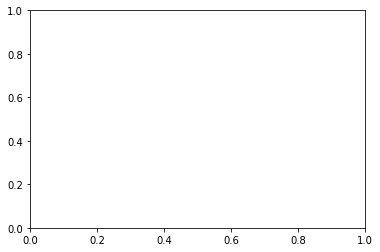

In [153]:
button = widgets.Button(description="Plot")
output = widgets.Output()
months = {idx+1: month for idx, month in enumerate(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep','oct', 'nov', 'dec'])}
metricDict = {'Cumulative Sum Cases': ConfirmedCumSumByCountryAndDate,
                      'Daily Cases': ConfirmedDailyCountryAndDate,
                     'Cumulative Sum Deaths': DeathsCumSumByCountryAndDate, 
                     'Daily Deaths': DeathsDailyCountryAndDate}

f, ax=plt.subplots()

def plotButtonCallback(b):
    countries = [country.strip() for country in countrySelections.value.strip().split(',')]
    beginningMonth, endingMonth = [months[x.month] for x in dateMask.value]
    output.clear_output()

    with output:
        clear_output(wait=True)
        metricDict[metric.value](plt.subplot(), *countries, beginningMonth=beginningMonth, endingMonth=endingMonth)

        show_inline_matplotlib_plots()

button.on_click(plotButtonCallback)

dateOptions = [(i.strftime('%b'), i) for i in dates]

dateMask = widgets.SelectionRangeSlider(
    options=dateOptions,
    index=(0,11),
    description='Months',
    disabled=False
)


countrySelections = widgets.Text(
    value='Italy, US',
    placeholder='Italy, US',
    description='Countries:',
    disabled=False
)

metric = widgets.ToggleButtons(
    options=['Cumulative Sum Cases', 'Daily Cases', 'Cumulative Sum Deaths', 'Daily Deaths'],
    description='Metric:',
    disabled=False,
#     tooltips=['Description of slow', 'Description of regular', 'Description of fast'],
#     icons=['check'] * 3
)


# def addCountry(e):
#     with output:
#         clear_output()
#         countrySelections.value =  countrySelections.value + ", " + countries.value
    

# countries = widgets.Dropdown(
#     options= [country.strip() for country in dataDf.columns.values],
#     value='US',
#     description='Countries in Dataset:',
#     disabled=False,
# )

# countries.observe(addCountry)


In [109]:

print(dataDf.columns)

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'West Bank and Gaza', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country_region', length=191)

#### Let's look at how well effort to "flatten curve" was in the US vs. Italy. Play around with the interactive widget below yourself.

In [154]:
display(dateMask, countrySelections, metric, button, output)

SelectionRangeSlider(description='Months', index=(0, 11), options=(('Jan', datetime.datetime(2020, 1, 22, 0, 0…

Text(value='Italy, US', description='Countries:', placeholder='Italy, US')

ToggleButtons(description='Metric:', options=('Cumulative Sum Cases', 'Daily Cases', 'Cumulative Sum Deaths', …

Button(description='Plot', style=ButtonStyle())

Output()

#### US case numbers blow everyone else's out of the water. A far second is Brazil:

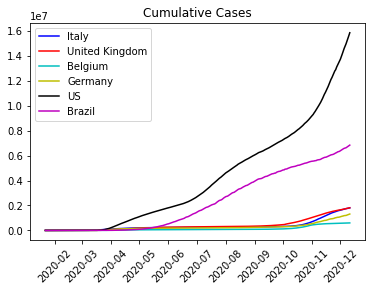

In [155]:

ConfirmedCumSumByCountryAndDate(plt.subplot(), "Italy", "United Kingdom", "Belgium", "Germany", "US", "Brazil")

**Italy was one of the first western countries the coronavirus arrived at. By end of March, Italy still had a higher *cumulative death* total, but the *cumulative case counts* in the US began to overtake those in Italy. But even before that, around mid March , *daily confirmed cases* overtook those of Italy even earlier .**

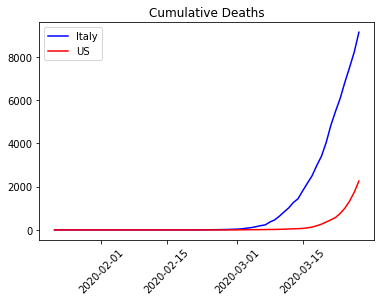

In [156]:
DeathsCumSumByCountryAndDate( plt.subplot(),"Italy", "US", beginningMonth="jan", endingMonth="Mar")

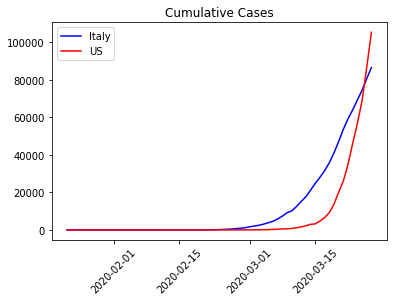

In [158]:
ConfirmedCumSumByCountryAndDate( plt.subplot(),"Italy", "US", beginningMonth="jan", endingMonth="Mar")

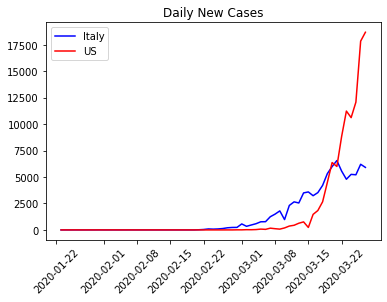

In [160]:
ConfirmedDailyCountryAndDate( plt.subplot(),"Italy", "US", beginningMonth="jan", endingMonth="Mar")